In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [26]:
# read data
data = pd.read_csv('/content/Mall_Customers.csv')

In [27]:
#display first 5 rows
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [28]:
#checking missing values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [29]:
#describe used to check what kind of data is there
print(data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [30]:
#select relevant columns for
X = data[['Age', 'Spending Score (1-100)']]

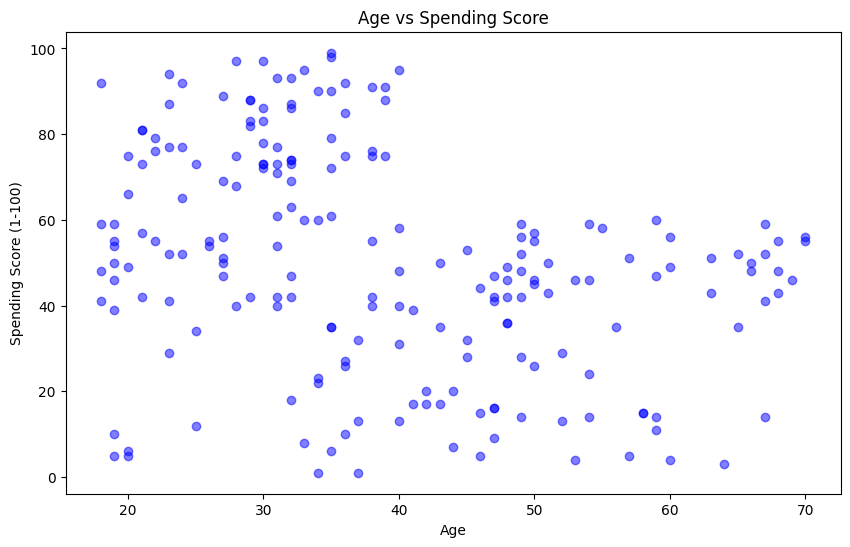

In [31]:
# Basic scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X['Age'], X['Spending Score (1-100)'], c='blue', alpha=0.5)
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [32]:
# Calculate inertia (within-cluster sum of squares) for different k values
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

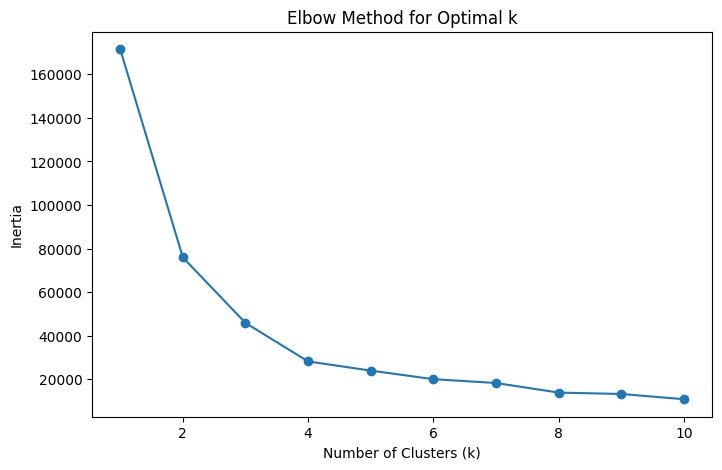

In [33]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [34]:
# Apply K-Means with 4 clusters (adjust based on elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)
# Add cluster labels to the dataframe
data['Cluster'] = clusters

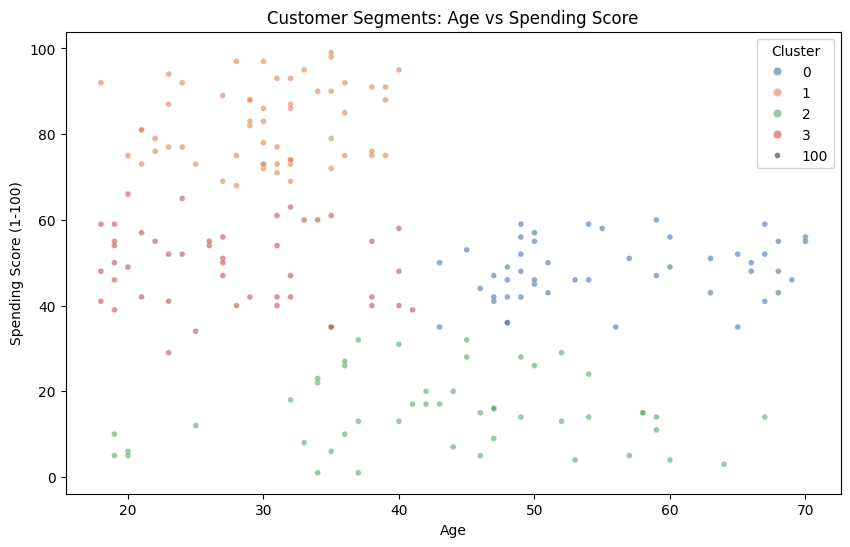

In [35]:
# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=data, palette='deep', size=100, alpha=0.6)
plt.title('Customer Segments: Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [36]:
print("Cluster Centers (Age, Spending Score):")
print(kmeans.cluster_centers_)

Cluster Centers (Age, Spending Score):
[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]
